<a href="https://colab.research.google.com/github/ind-kum/M.L.-EVELUTION-PROJECTS/blob/master/%23Head_Brain_Size_Using_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/ind-kum/Datasets/master/headbrain.csv")
df

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


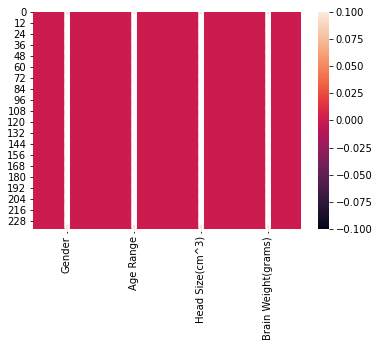

In [2]:
#Lets check whether the null values are present in the dataset or not using heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(),annot=True)
plt.show()

In [3]:
#Lets check the null vales without using visualisation
df.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [4]:
#Lets check whether their are outliers present in the dataset or not
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(237, 4)
(236, 4)


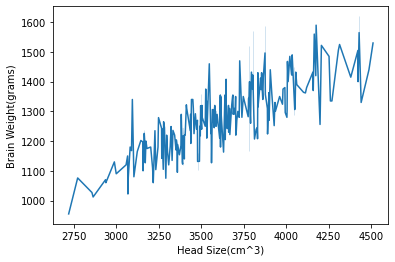

In [5]:
#Lets check the how Brain Weight(grams) is changing with respect to Head Size(cm^3)
sns.lineplot(x=df_final["Head Size(cm^3)"],y=df_final["Brain Weight(grams)"],data=df_final)
plt.show()
#The below graph clearly shows that with increase in head size their is increase in brain weight too

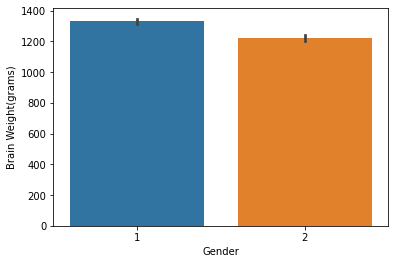

In [6]:
#Lets check what is the average brain size according to gender
sns.barplot(x=df_final["Gender"],y=df_final["Brain Weight(grams)"],data=df_final)
plt.show()

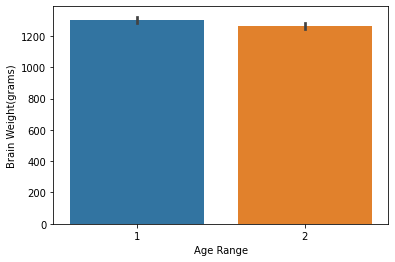

In [7]:
#Now Lets check what is the average brain size according to age range
sns.barplot(x=df_final["Age Range"],y=df_final["Brain Weight(grams)"],data=df_final)
plt.show()

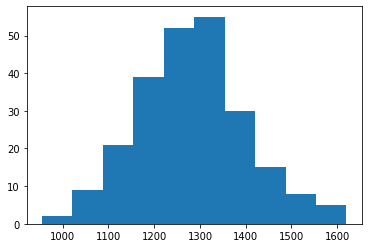

In [8]:
#Lets draw histogram for brain weight
plt.hist(x="Brain Weight(grams)",bins=10,data=df_final)
plt.show()
#we can say it shows almost normal distribution based on below output

In [9]:
#Lets check skewness of the dataset
df_final.skew()
#Below shows acceptable level of skewnes

Gender                 0.257959
Age Range             -0.153968
Head Size(cm^3)        0.164767
Brain Weight(grams)    0.205274
dtype: float64

In [10]:
#Now Let seprate input and output variable to be used for the linear regression problem
x=df_final[["Head Size(cm^3)"]]
y=df_final[["Brain Weight(grams)"]]
x.shape

(236, 1)

In [11]:
y.shape

(236, 1)

In [12]:
#scanling down using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 2.46589809],
       [ 0.30372296],
       [ 1.7647276 ],
       [ 0.41266977],
       [ 1.53007294],
       [-0.12368375],
       [ 0.43501784],
       [-0.19631495],
       [-0.04546553],
       [ 0.9853389 ],
       [-0.52036187],
       [ 1.01606748],
       [ 0.02995919],
       [ 1.61667168],
       [ 0.56631271],
       [ 0.68922706],
       [-0.36951244],
       [-0.45611119],
       [-1.49250262],
       [ 2.22006939],
       [ 0.69481407],
       [ 1.1641234 ],
       [ 0.48809449],
       [ 0.22550474],
       [ 2.21727589],
       [ 1.13618832],
       [ 1.09707921],
       [-0.48963328],
       [ 1.52448592],
       [ 0.44060485],
       [ 0.46574642],
       [ 1.32335335],
       [ 1.48537681],
       [ 1.47699629],
       [ 0.51602957],
       [-0.28570721],
       [ 0.33165804],
       [-0.82485423],
       [-0.38347998],
       [ 0.92946874],
       [-0.34716438],
       [ 1.91557703],
       [ 0.48809449],
       [ 0.65291145],
       [ 1.13060131],
       [ 1

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

# 1.  Linear Regression

---



---



---

In [14]:
#Lets use LInear regression and check max r2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)
print('----------------------------------------------------------------------')
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())

r2 score corresponding to  42  is  0.5160439339209708
r2 score corresponding to  43  is  0.7390820760256583
r2 score corresponding to  44  is  0.5359704407099068
r2 score corresponding to  45  is  0.7179743617057047
r2 score corresponding to  46  is  0.6374863798560535
r2 score corresponding to  47  is  0.6392680441660814
r2 score corresponding to  48  is  0.6706309006045819
r2 score corresponding to  49  is  0.7637633745880883
r2 score corresponding to  50  is  0.588690940616982
r2 score corresponding to  51  is  0.463872906496715
r2 score corresponding to  52  is  0.7814049973715858
r2 score corresponding to  53  is  0.6693035417585758
r2 score corresponding to  54  is  0.6180044907461555
r2 score corresponding to  55  is  0.679837724748311
r2 score corresponding to  56  is  0.5648237961804998
r2 score corresponding to  57  is  0.4948578643087602
r2 score corresponding to  58  is  0.6598772428845934
r2 score corresponding to  59  is  0.5867788491433329
r2 score corresponding to  60  

# 2.  KNeighbor Regression

---



---



---



---



In [15]:
#Lets use grid_search to find optimal value of n_neigbors for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 22}

In [16]:
#Lets use KNN regression and check max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=22)
r_state=maxr2_score(knr,x,y)
print('----------------------------------------------------------------------------')
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

r2 score corresponding to  42  is  0.5254582301537805
r2 score corresponding to  43  is  0.6568897319093183
r2 score corresponding to  44  is  0.46258539694791245
r2 score corresponding to  45  is  0.6051891512929217
r2 score corresponding to  46  is  0.6017140520527353
r2 score corresponding to  47  is  0.606960526158836
r2 score corresponding to  48  is  0.6132327786450276
r2 score corresponding to  49  is  0.7173139044569561
r2 score corresponding to  50  is  0.5320267483556209
r2 score corresponding to  51  is  0.44221322653733364
r2 score corresponding to  52  is  0.6921753819572353
r2 score corresponding to  53  is  0.6166204893116669
r2 score corresponding to  54  is  0.5765195994183165
r2 score corresponding to  55  is  0.6335954002316917
r2 score corresponding to  56  is  0.49533285068922495
r2 score corresponding to  57  is  0.4829361738808573
r2 score corresponding to  58  is  0.5573580103289252
r2 score corresponding to  59  is  0.5674832376025567
r2 score corresponding to 

# 3.  Lasso Regression

---



---



---

In [17]:
#Lets check lasso regression and find best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg, parameters, cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [18]:
#Lets check max r2 score when we use Lasso
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)
print('----------------------------------------------------------------------------------------')
print("Mean r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())

r2 score corresponding to  42  is  0.5160454080254829
r2 score corresponding to  43  is  0.7390843436385253
r2 score corresponding to  44  is  0.5359709178260349
r2 score corresponding to  45  is  0.7179714306769396
r2 score corresponding to  46  is  0.637487724818552
r2 score corresponding to  47  is  0.6392661455618073
r2 score corresponding to  48  is  0.6706302256368422
r2 score corresponding to  49  is  0.7637628792864153
r2 score corresponding to  50  is  0.588691663070912
r2 score corresponding to  51  is  0.4638755710036714
r2 score corresponding to  52  is  0.7814014705417708
r2 score corresponding to  53  is  0.6693015252730038
r2 score corresponding to  54  is  0.6180044326392604
r2 score corresponding to  55  is  0.6798365069484629
r2 score corresponding to  56  is  0.5648225884950677
r2 score corresponding to  57  is  0.4948602258980076
r2 score corresponding to  58  is  0.659876454990819
r2 score corresponding to  59  is  0.5867819258039564
r2 score corresponding to  60  

# 4. Decision Tree Regressor

---



---



---



---



In [19]:
#Lets use decision tree
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier()
r_state=maxr2_score(dtr,x,y)
print('----------------------------------------------------------------------------------------')
print("Mean r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
#We can see this model is not performing well

r2 score corresponding to  42  is  0.375521916809503
r2 score corresponding to  43  is  0.07298098854258805
r2 score corresponding to  44  is  0.20814189651477777
r2 score corresponding to  45  is  0.35636939940859524
r2 score corresponding to  46  is  -0.026023632813956032
r2 score corresponding to  47  is  0.3357584952126389
r2 score corresponding to  48  is  0.4698918924562272
r2 score corresponding to  49  is  0.5756841307770824
r2 score corresponding to  50  is  0.2914287416283008
r2 score corresponding to  51  is  0.20293812767387465
r2 score corresponding to  52  is  0.6432768246362249
r2 score corresponding to  53  is  0.3779929561036486
r2 score corresponding to  54  is  0.29701361294839057
r2 score corresponding to  55  is  0.4359735302375518
r2 score corresponding to  56  is  0.3259360696206838
r2 score corresponding to  57  is  0.012152021960709525
r2 score corresponding to  58  is  0.27024454237279594
r2 score corresponding to  59  is  0.4149895784261559
r2 score correspon

# 4. SVM Regressor

---



---



---

In [29]:
#Lets use SVM
from sklearn.svm import SVR
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [30]:
svr=SVR(kernel="linear",C=10)
r_state=maxr2_score(svr,x,y)
print('----------------------------------------------------------------------------------------')
print("Mean r2 score for SVM Regression: ",cross_val_score(svr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for SVM Regression: ",cross_val_score(svr,x,y,cv=5,scoring="r2").std())

r2 score corresponding to  42  is  0.5205508132024779
r2 score corresponding to  43  is  0.7501144194982108
r2 score corresponding to  44  is  0.5357209563117784
r2 score corresponding to  45  is  0.6802877980038426
r2 score corresponding to  46  is  0.6408617938785378
r2 score corresponding to  47  is  0.6024691408227314
r2 score corresponding to  48  is  0.663606863538328
r2 score corresponding to  49  is  0.7610545958662609
r2 score corresponding to  50  is  0.5896391314008279
r2 score corresponding to  51  is  0.4786036868612614
r2 score corresponding to  52  is  0.770086164741735
r2 score corresponding to  53  is  0.657773121935961
r2 score corresponding to  54  is  0.6153607393871146
r2 score corresponding to  55  is  0.6705906245095252
r2 score corresponding to  56  is  0.5440932231985232
r2 score corresponding to  57  is  0.4956862603159301
r2 score corresponding to  58  is  0.65937155129634
r2 score corresponding to  59  is  0.5955067264071252
r2 score corresponding to  60  is

# 5.  GradientBoosting Regressor

---



---

---



---



In [22]:
#Now we will try to use gradient boosting technique
#For getting best set of parmeters we will use grid search
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf = GridSearchCV(gbr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [23]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
r_state=maxr2_score(gbr,x,y)
print('----------------------------------------------------------------------------------------')
print("Mean r2 score for gradient boosting Regression: ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression: ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

r2 score corresponding to  42  is  0.5695492397015001
r2 score corresponding to  43  is  0.615020986307722
r2 score corresponding to  44  is  0.5178497263412996
r2 score corresponding to  45  is  0.6331594517396149
r2 score corresponding to  46  is  0.562142574619932
r2 score corresponding to  47  is  0.5930879060361992
r2 score corresponding to  48  is  0.6677114020883863
r2 score corresponding to  49  is  0.7868866990043797
r2 score corresponding to  50  is  0.5143721555742837
r2 score corresponding to  51  is  0.4058227660905892
r2 score corresponding to  52  is  0.7499884431002993
r2 score corresponding to  53  is  0.6626651974864439
r2 score corresponding to  54  is  0.561849990736809
r2 score corresponding to  55  is  0.6391428410452431
r2 score corresponding to  56  is  0.5193917188425232
r2 score corresponding to  57  is  0.46585264684701766
r2 score corresponding to  58  is  0.5790478052196748
r2 score corresponding to  59  is  0.6134173750793275
r2 score corresponding to  60 

# 6. AdaBoost Regressor

---



---



---



In [25]:
#Now Lets use ada boost regression alagorithm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lreg,lsreg,DecisionTreeRegressor()]}
clf = GridSearchCV(ada_reg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'learning_rate': 1,
 'n_estimators': 10}

In [26]:
ada_reg=AdaBoostRegressor(base_estimator=lreg,learning_rate=1,n_estimators=10)
r_state=maxr2_score(ada_reg,x,y)
print('----------------------------------------------------------------------------------------')
print("Mean r2 score for AdaBoost Regressor: ",cross_val_score(ada_reg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for AdaBoost Regressor: ",cross_val_score(ada_reg,x,y,cv=5,scoring="r2").std())

r2 score corresponding to  42  is  0.5086608886570827
r2 score corresponding to  43  is  0.7499844717410658
r2 score corresponding to  44  is  0.5267871762416482
r2 score corresponding to  45  is  0.7296654631110762
r2 score corresponding to  46  is  0.6351914515050081
r2 score corresponding to  47  is  0.6363515566948892
r2 score corresponding to  48  is  0.6671221584193732
r2 score corresponding to  49  is  0.7632079425723008
r2 score corresponding to  50  is  0.5887981871155004
r2 score corresponding to  51  is  0.47004988730592645
r2 score corresponding to  52  is  0.76462379328766
r2 score corresponding to  53  is  0.6551072335930541
r2 score corresponding to  54  is  0.6184819934876076
r2 score corresponding to  55  is  0.6795808420680605
r2 score corresponding to  56  is  0.5669916898595817
r2 score corresponding to  57  is  0.5031270519350612
r2 score corresponding to  58  is  0.6404632911926329
r2 score corresponding to  59  is  0.5864421517434288
r2 score corresponding to  60

# **7. RandomForest Regressor**

---



---



---



In [27]:
#lets use random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500,1000]}
clf = GridSearchCV(rfr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'n_estimators': 10}

In [28]:
rfr=RandomForestRegressor(n_estimators=10)
r_state=maxr2_score(rfr,x,y)
print('----------------------------------------------------------------------------------------')
print("Mean r2 score for rfr: ",cross_val_score(rfr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for rfr: ",cross_val_score(rfr,x,y,cv=5,scoring="r2").std())

r2 score corresponding to  42  is  0.44231432328498
r2 score corresponding to  43  is  0.4861499332814657
r2 score corresponding to  44  is  0.3409963765064552
r2 score corresponding to  45  is  0.5262505964011082
r2 score corresponding to  46  is  0.44127117926032144
r2 score corresponding to  47  is  0.5134920738409186
r2 score corresponding to  48  is  0.6104394060442111
r2 score corresponding to  49  is  0.7440584831919641
r2 score corresponding to  50  is  0.41993418722182974
r2 score corresponding to  51  is  0.35714106591892925
r2 score corresponding to  52  is  0.7006680007621018
r2 score corresponding to  53  is  0.49950480608053005
r2 score corresponding to  54  is  0.4338809054503484
r2 score corresponding to  55  is  0.5227833541764699
r2 score corresponding to  56  is  0.4246616330872519
r2 score corresponding to  57  is  0.23927712676715795
r2 score corresponding to  58  is  0.41689439144565754
r2 score corresponding to  59  is  0.38857657968276993
r2 score corresponding 

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state =49,test_size=0.20)
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [32]:
#Lets find the rmse and r2_score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))


RMSE is:  54.70516766137211
r2_score is:  0.7868866990043797
